In [2]:
#Importing the libraries for Data Manipulation and Visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
%matplotlib inline
matplotlib.style.use('fivethirtyeight')


D:\Anaconda\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#Importing the libraries for data modelling and error metrics
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
## for feature selection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [4]:
#Importing the train and test dataset
train=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")

In [5]:
traindata=train.copy()
testdata=test.copy()

#### Checking the train data

In [6]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
train.shape

(1460, 81)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [9]:
features_withna=[features for features in train.columns if train[features].isna().sum()>1]
for features in features_withna:
    print(features,' has ' , train[features].isna().sum(), "  Missing Values out of ", train.shape[0], "\n")

LotFrontage  has  259   Missing Values out of  1460 

Alley  has  1369   Missing Values out of  1460 

MasVnrType  has  8   Missing Values out of  1460 

MasVnrArea  has  8   Missing Values out of  1460 

BsmtQual  has  37   Missing Values out of  1460 

BsmtCond  has  37   Missing Values out of  1460 

BsmtExposure  has  38   Missing Values out of  1460 

BsmtFinType1  has  37   Missing Values out of  1460 

BsmtFinType2  has  38   Missing Values out of  1460 

FireplaceQu  has  690   Missing Values out of  1460 

GarageType  has  81   Missing Values out of  1460 

GarageYrBlt  has  81   Missing Values out of  1460 

GarageFinish  has  81   Missing Values out of  1460 

GarageQual  has  81   Missing Values out of  1460 

GarageCond  has  81   Missing Values out of  1460 

PoolQC  has  1453   Missing Values out of  1460 

Fence  has  1179   Missing Values out of  1460 

MiscFeature  has  1406   Missing Values out of  1460 



In [10]:
#Removing the features with large number of missing values
train.drop(['MiscFeature','Fence','PoolQC','Alley'], axis=1, inplace=True)

In [11]:
features_withna.remove('MiscFeature')
features_withna.remove('Fence')
features_withna.remove('PoolQC')
features_withna.remove('Alley')

In [12]:
train.columns.str.contains('Yr') |train.columns.str.contains('Year')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False])

### Handling Missing values

In [13]:
temporal_features=[features for features in train.columns if 'Yr' in features or 'Year' in features]
numeric_features=[features for features in train.columns if train[features].dtypes in ['int64', 'float64'] and features not in temporal_features ]
object_features=[features for features in train.columns if train[features].dtypes=='object']


In [14]:
numeric_features

['Id',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'SalePrice']

In [15]:
object_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [16]:
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

### Get number of unique values for categorical features

In [17]:
for features in object_features:
    print(features ,' has ', train[features].nunique(), ' unique values\n')

MSZoning  has  5  unique values

Street  has  2  unique values

LotShape  has  4  unique values

LandContour  has  4  unique values

Utilities  has  2  unique values

LotConfig  has  5  unique values

LandSlope  has  3  unique values

Neighborhood  has  25  unique values

Condition1  has  9  unique values

Condition2  has  8  unique values

BldgType  has  5  unique values

HouseStyle  has  8  unique values

RoofStyle  has  6  unique values

RoofMatl  has  8  unique values

Exterior1st  has  15  unique values

Exterior2nd  has  16  unique values

MasVnrType  has  4  unique values

ExterQual  has  4  unique values

ExterCond  has  5  unique values

Foundation  has  6  unique values

BsmtQual  has  4  unique values

BsmtCond  has  4  unique values

BsmtExposure  has  4  unique values

BsmtFinType1  has  6  unique values

BsmtFinType2  has  6  unique values

Heating  has  6  unique values

HeatingQC  has  5  unique values

CentralAir  has  2  unique values

Electrical  has  5  unique value

### Replacing the Numeric missing values with Median values of the Column and Object Column missing values with max values 

In [18]:
for features in features_withna:
    if features in object_features:
        train[features].fillna(train[features].mode()[0], inplace=True)
    else:
        train[features].fillna(train[features].median(), inplace=True)        

In [19]:
for features in features_withna:
    print(features, train[features].isna().sum(), "  Missing Values out of ", train.shape[0], "\n")

LotFrontage 0   Missing Values out of  1460 

MasVnrType 0   Missing Values out of  1460 

MasVnrArea 0   Missing Values out of  1460 

BsmtQual 0   Missing Values out of  1460 

BsmtCond 0   Missing Values out of  1460 

BsmtExposure 0   Missing Values out of  1460 

BsmtFinType1 0   Missing Values out of  1460 

BsmtFinType2 0   Missing Values out of  1460 

FireplaceQu 0   Missing Values out of  1460 

GarageType 0   Missing Values out of  1460 

GarageYrBlt 0   Missing Values out of  1460 

GarageFinish 0   Missing Values out of  1460 

GarageQual 0   Missing Values out of  1460 

GarageCond 0   Missing Values out of  1460 



Now all the missing values are handled in train data, let's check out test data

## Test Data

In [20]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [21]:
test.shape

(1459, 80)

Here we have 1 feature less which is the Target variable 'Sale Price'

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [23]:
features_withnatest=[features for features in test.columns if test[features].isna().sum()>1]
for features in features_withnatest:
    print(features, ' has ' , test[features].isna().sum(), "  Missing Values out of ", test.shape[0], "\n")

MSZoning  has  4   Missing Values out of  1459 

LotFrontage  has  227   Missing Values out of  1459 

Alley  has  1352   Missing Values out of  1459 

Utilities  has  2   Missing Values out of  1459 

MasVnrType  has  16   Missing Values out of  1459 

MasVnrArea  has  15   Missing Values out of  1459 

BsmtQual  has  44   Missing Values out of  1459 

BsmtCond  has  45   Missing Values out of  1459 

BsmtExposure  has  44   Missing Values out of  1459 

BsmtFinType1  has  42   Missing Values out of  1459 

BsmtFinType2  has  42   Missing Values out of  1459 

BsmtFullBath  has  2   Missing Values out of  1459 

BsmtHalfBath  has  2   Missing Values out of  1459 

Functional  has  2   Missing Values out of  1459 

FireplaceQu  has  730   Missing Values out of  1459 

GarageType  has  76   Missing Values out of  1459 

GarageYrBlt  has  78   Missing Values out of  1459 

GarageFinish  has  78   Missing Values out of  1459 

GarageQual  has  78   Missing Values out of  1459 

GarageCond

In [24]:
#Removing the features with large number of missing values
test.drop(['MiscFeature','Fence','PoolQC','Alley'], axis=1, inplace=True)

In [25]:
features_withnatest

['MSZoning',
 'LotFrontage',
 'Alley',
 'Utilities',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [26]:
features_withnatest.remove('MiscFeature')
features_withnatest.remove('Fence')
features_withnatest.remove('PoolQC')
features_withnatest.remove('Alley')

### Handling Missing values in Test Data

In [27]:
temporal_features_test=[features for features in test.columns if 'Yr' in features or 'Year' in features]
numeric_features_test=[features for features in test.columns if test[features].dtypes in ['int64', 'float64'] and features not in temporal_features ]
object_features_test=[features for features in test.columns if test[features].dtypes=='object']

### Get number of Unique features for Categorical Values

In [28]:
for features in object_features_test:
    print(features ,' has ', test[features].nunique(), 'unique values\n')

MSZoning  has  5 unique values

Street  has  2 unique values

LotShape  has  4 unique values

LandContour  has  4 unique values

Utilities  has  1 unique values

LotConfig  has  5 unique values

LandSlope  has  3 unique values

Neighborhood  has  25 unique values

Condition1  has  9 unique values

Condition2  has  5 unique values

BldgType  has  5 unique values

HouseStyle  has  7 unique values

RoofStyle  has  6 unique values

RoofMatl  has  4 unique values

Exterior1st  has  13 unique values

Exterior2nd  has  15 unique values

MasVnrType  has  4 unique values

ExterQual  has  4 unique values

ExterCond  has  5 unique values

Foundation  has  6 unique values

BsmtQual  has  4 unique values

BsmtCond  has  4 unique values

BsmtExposure  has  4 unique values

BsmtFinType1  has  6 unique values

BsmtFinType2  has  6 unique values

Heating  has  4 unique values

HeatingQC  has  5 unique values

CentralAir  has  2 unique values

Electrical  has  4 unique values

KitchenQual  has  4 unique

### Replacing the Numeric missing values with Median values of the Column and Object Column missing values with max values 

In [29]:
for features in features_withnatest:
    if features in object_features_test:
        test[features].fillna(test[features].mode()[0], inplace=True)
    else:
        test[features].fillna(test[features].median(), inplace=True)    

In [30]:
for features in features_withnatest:
    print(features, ' has ' , test[features].isna().sum(), "  Missing Values out of ", test.shape[0], "\n")

MSZoning  has  0   Missing Values out of  1459 

LotFrontage  has  0   Missing Values out of  1459 

Utilities  has  0   Missing Values out of  1459 

MasVnrType  has  0   Missing Values out of  1459 

MasVnrArea  has  0   Missing Values out of  1459 

BsmtQual  has  0   Missing Values out of  1459 

BsmtCond  has  0   Missing Values out of  1459 

BsmtExposure  has  0   Missing Values out of  1459 

BsmtFinType1  has  0   Missing Values out of  1459 

BsmtFinType2  has  0   Missing Values out of  1459 

BsmtFullBath  has  0   Missing Values out of  1459 

BsmtHalfBath  has  0   Missing Values out of  1459 

Functional  has  0   Missing Values out of  1459 

FireplaceQu  has  0   Missing Values out of  1459 

GarageType  has  0   Missing Values out of  1459 

GarageYrBlt  has  0   Missing Values out of  1459 

GarageFinish  has  0   Missing Values out of  1459 

GarageQual  has  0   Missing Values out of  1459 

GarageCond  has  0   Missing Values out of  1459 



In [31]:
test['BsmtHalfBath'].fillna(test['BsmtHalfBath'].mode()[0], inplace=True)

In [32]:
test['BsmtFullBath'].fillna(test['BsmtFullBath'].mode()[0], inplace=True)

In [33]:
test['Functional'].fillna(test['Functional'].mode()[0], inplace=True)

In [34]:
test['MSZoning'].fillna(test['MSZoning'].mode()[0], inplace=True)

In [35]:
test['Utilities'].fillna(test['Utilities'].mode()[0], inplace=True)

## EDA for Training Data

In [36]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


### Checking the various categorical variables

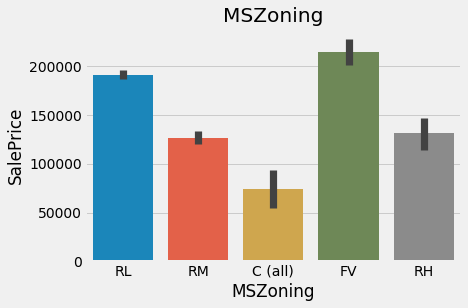

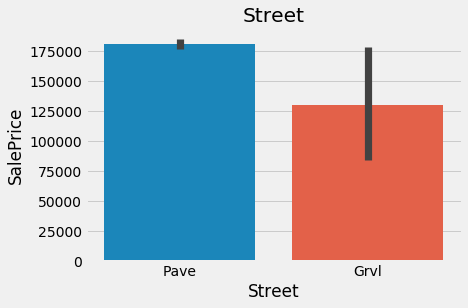

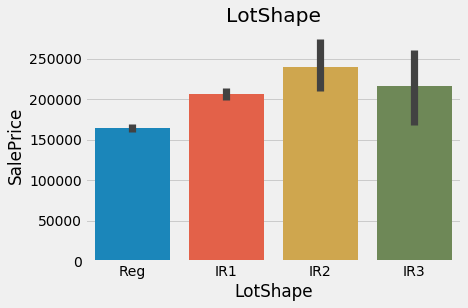

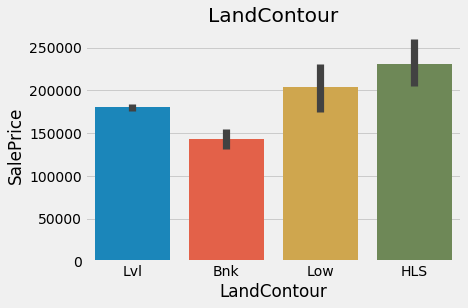

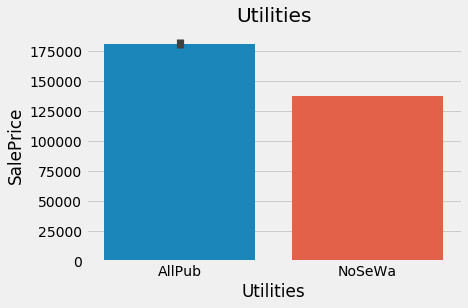

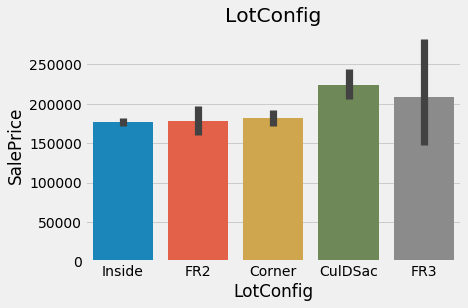

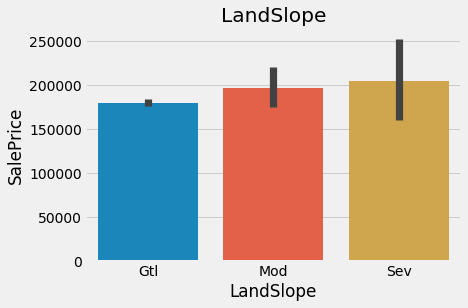

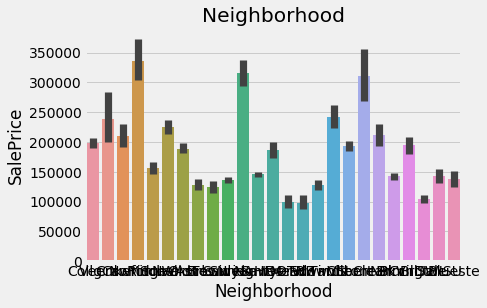

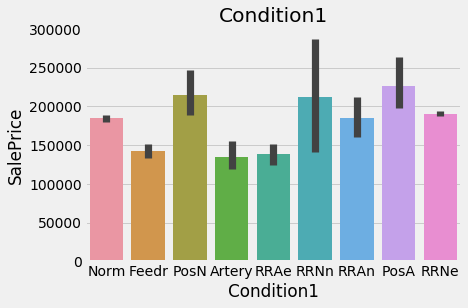

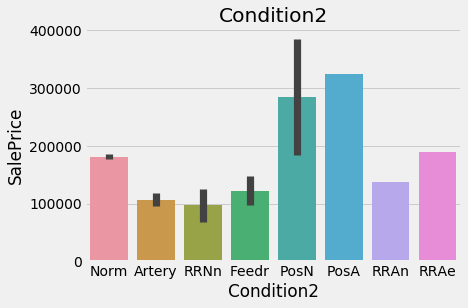

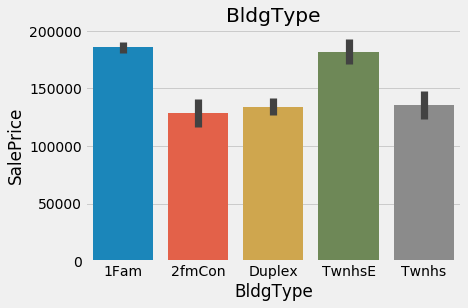

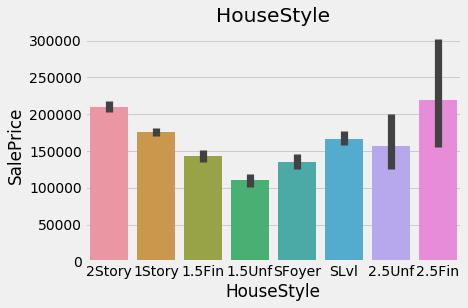

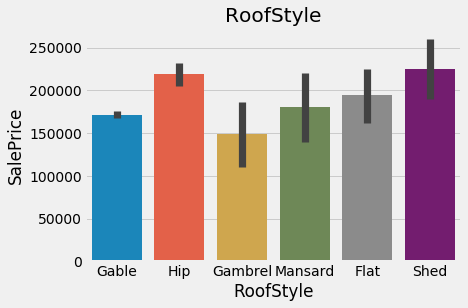

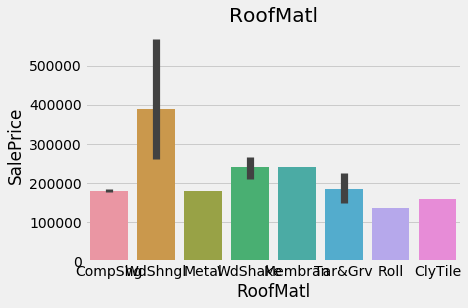

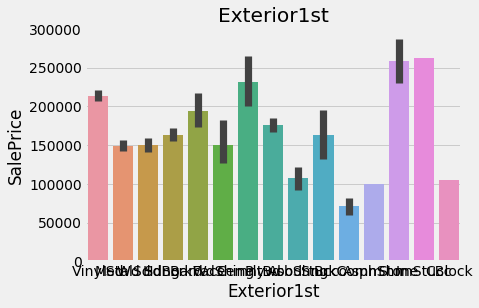

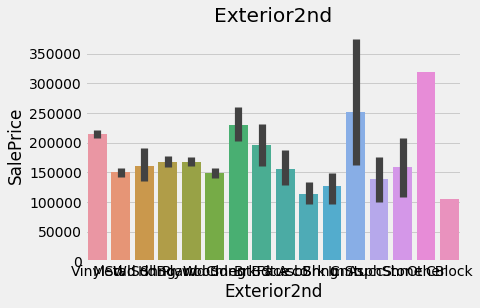

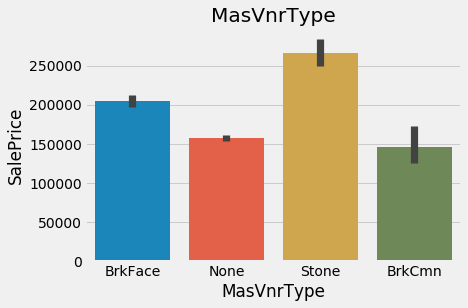

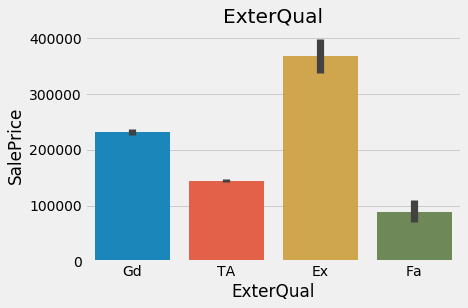

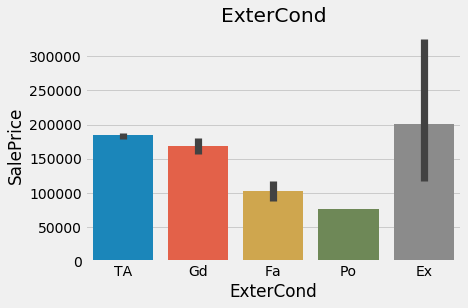

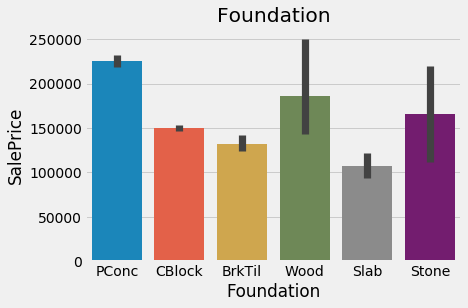

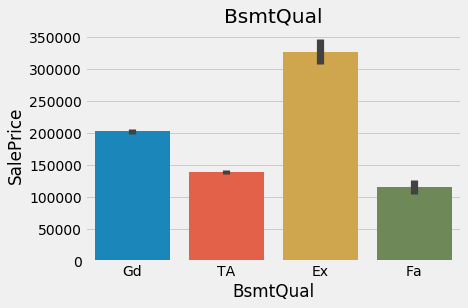

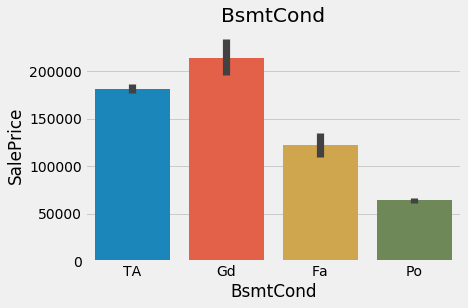

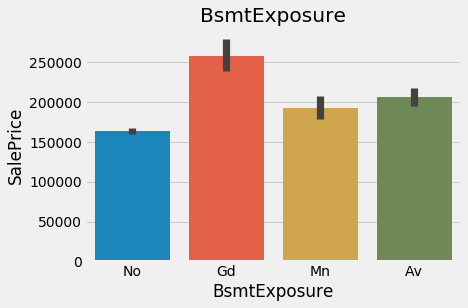

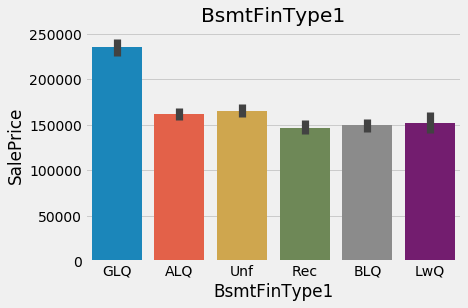

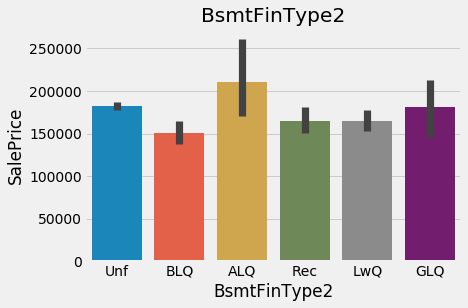

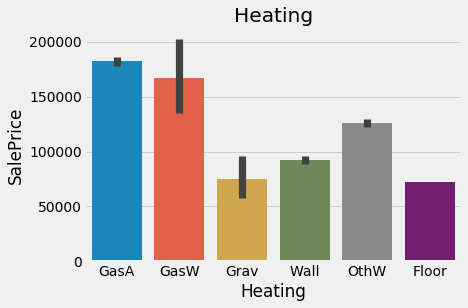

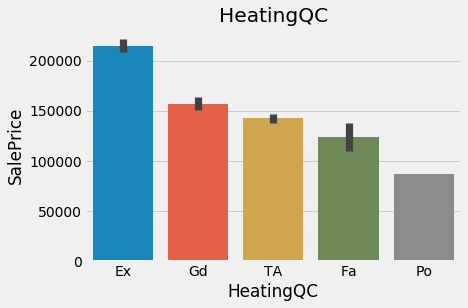

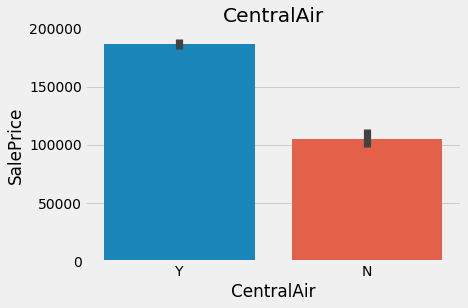

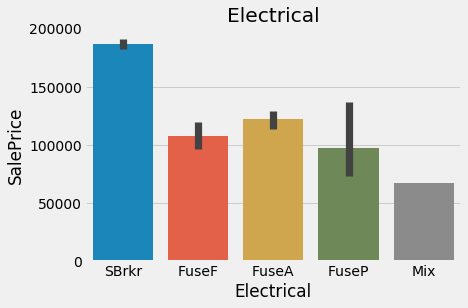

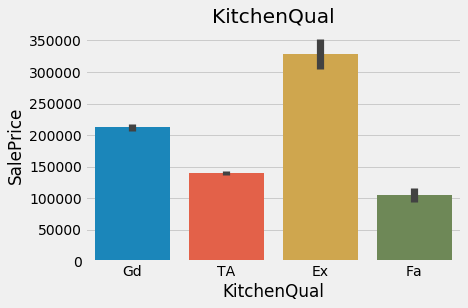

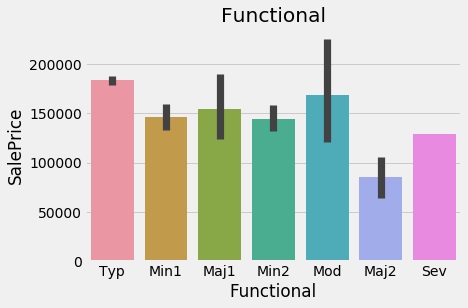

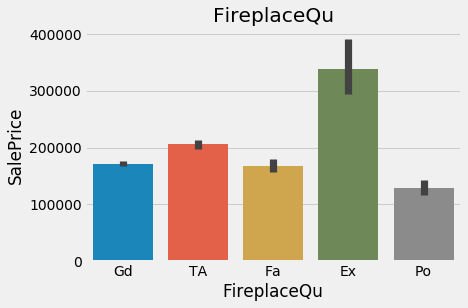

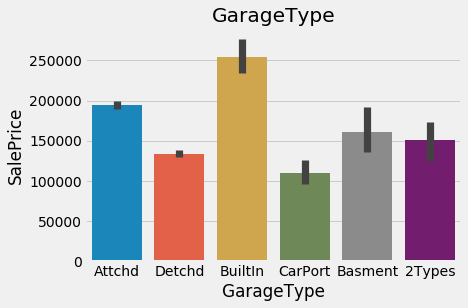

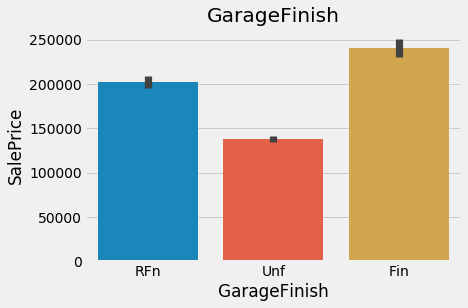

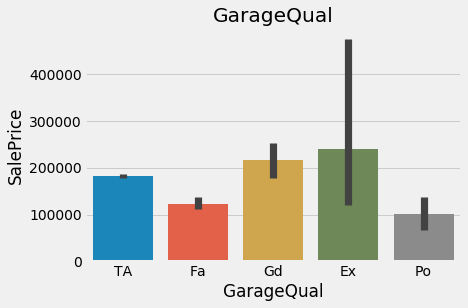

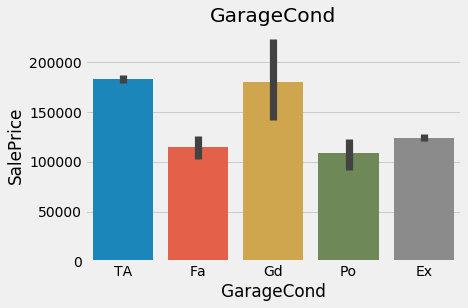

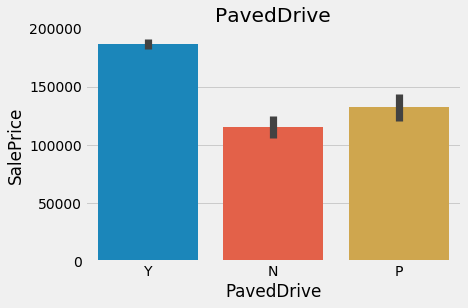

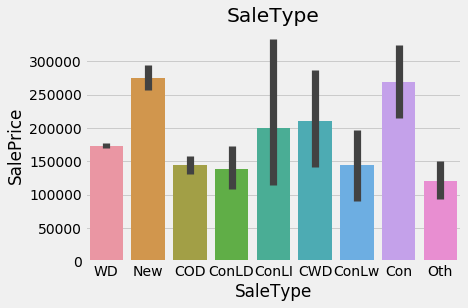

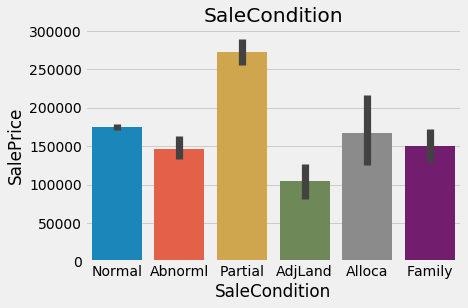

In [37]:
## Lets Find the relationship between Categorical Features and Sale PRice

for feature in object_features:
    sns.barplot(x=train[feature],y=train['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

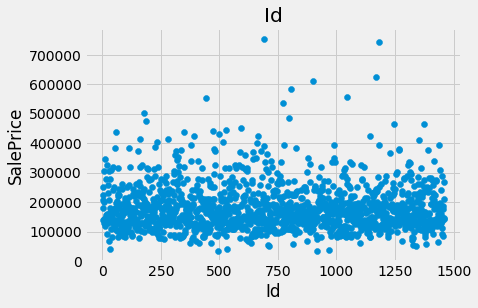

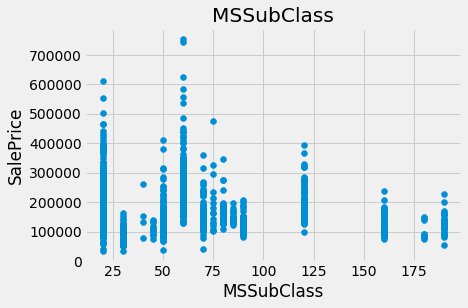

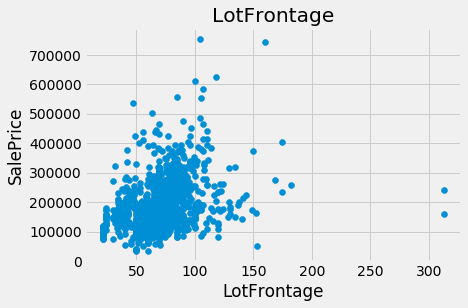

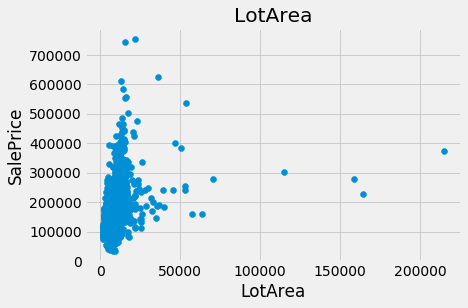

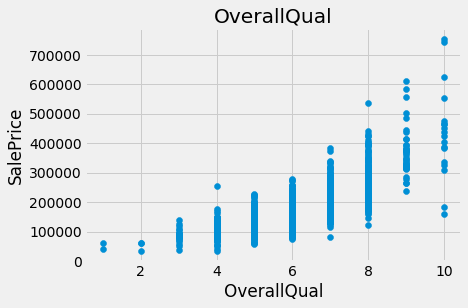

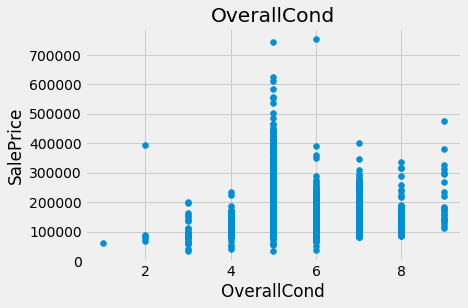

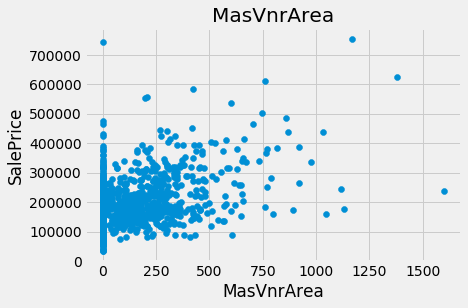

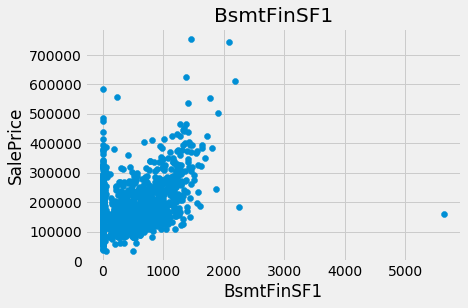

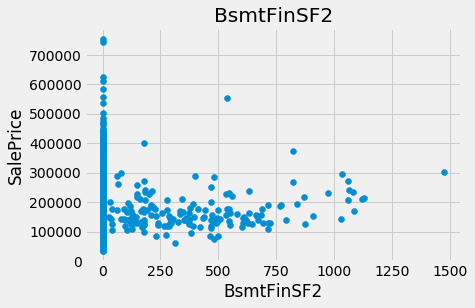

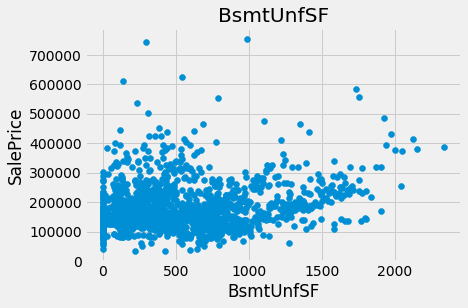

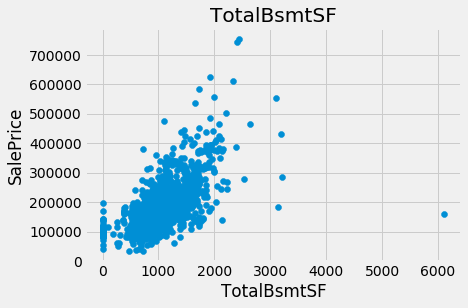

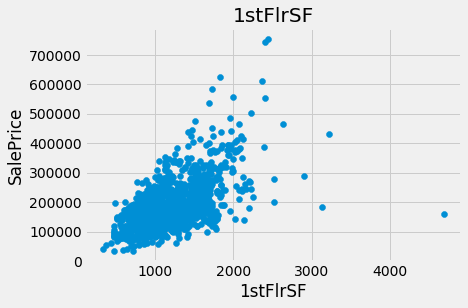

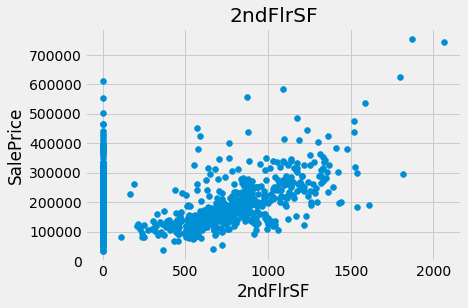

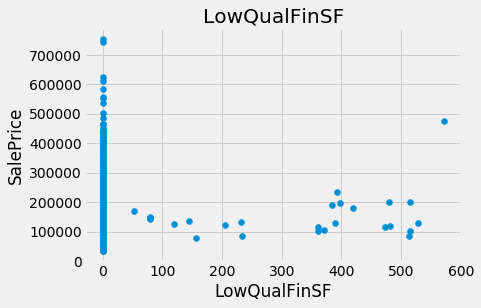

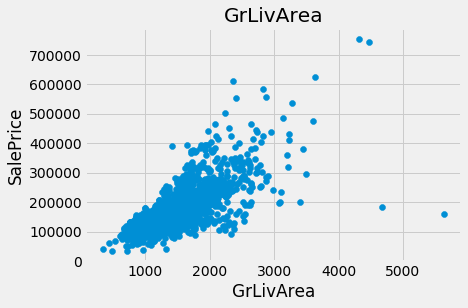

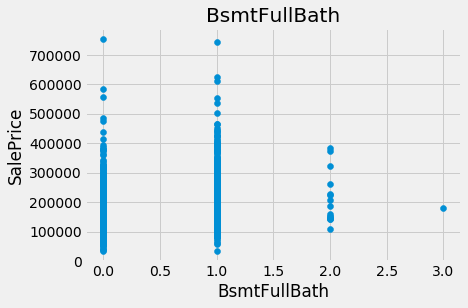

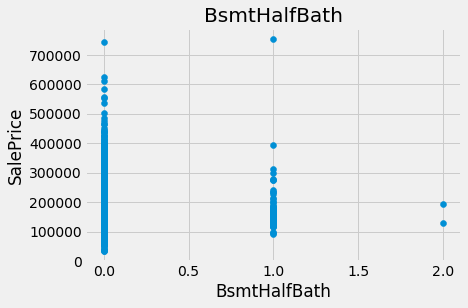

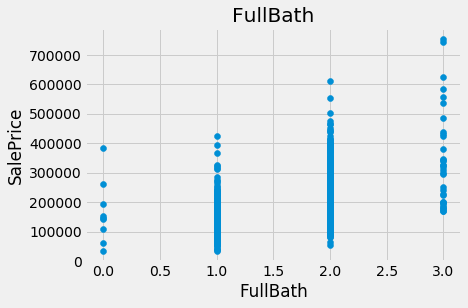

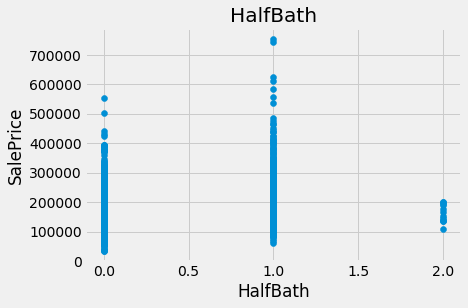

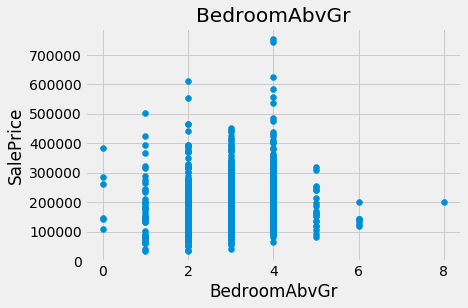

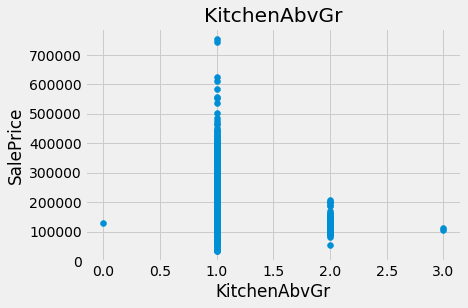

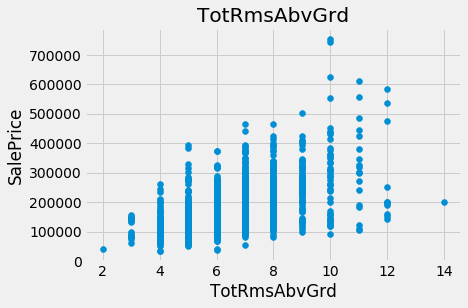

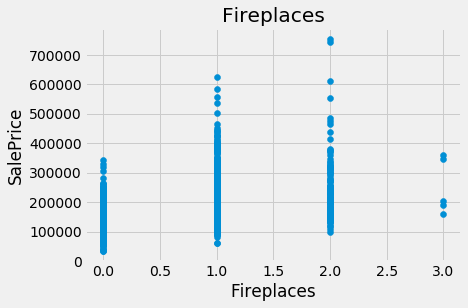

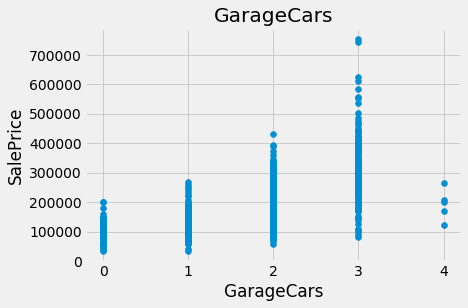

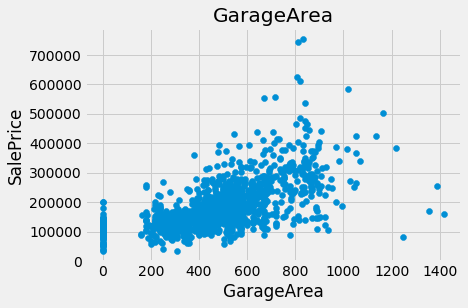

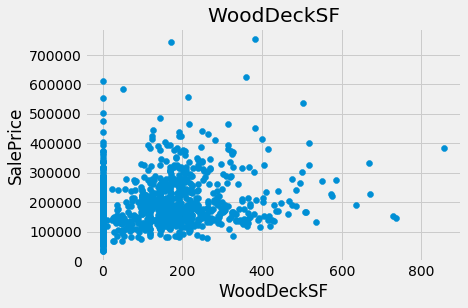

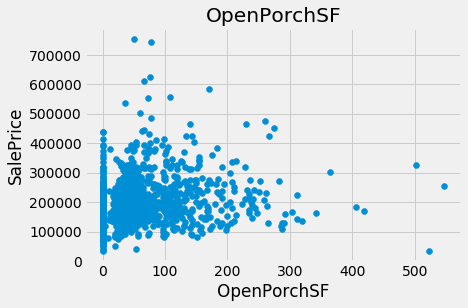

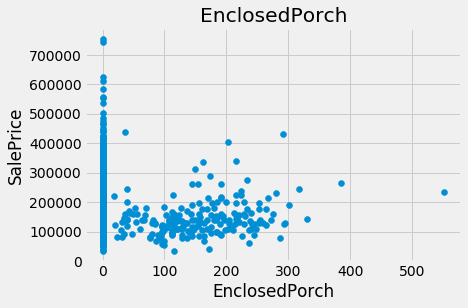

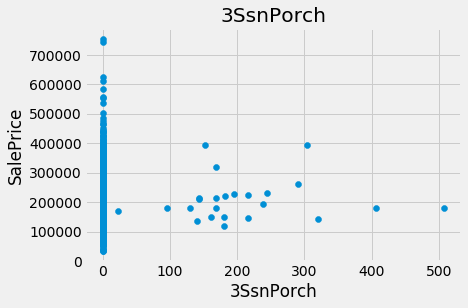

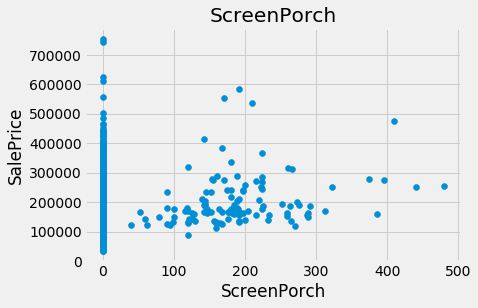

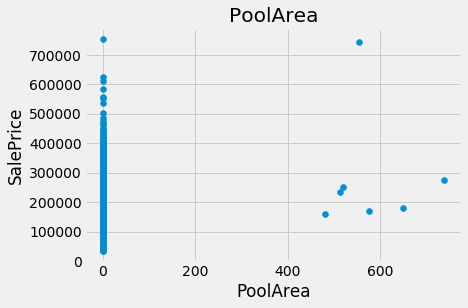

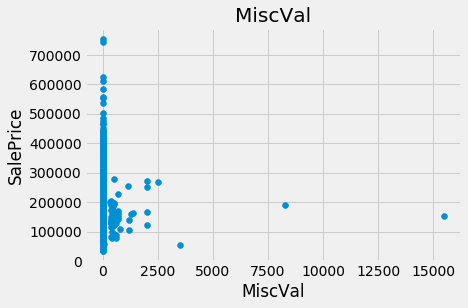

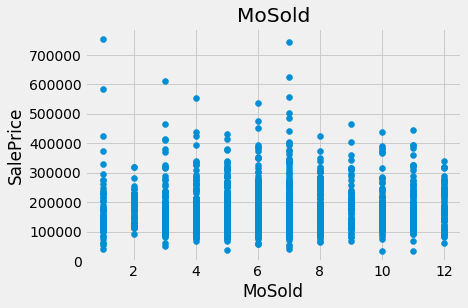

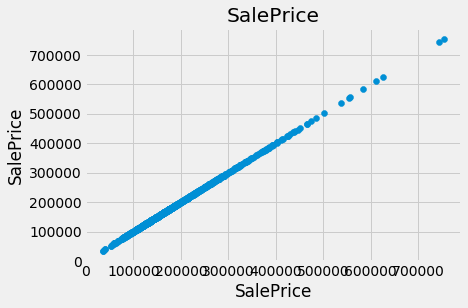

In [38]:
## Lets Find the realtionship between Categorical Features and Sale Price

for feature in numeric_features:
    plt.scatter(x=train[feature],y=train['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

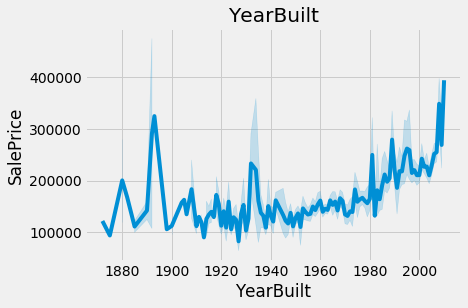

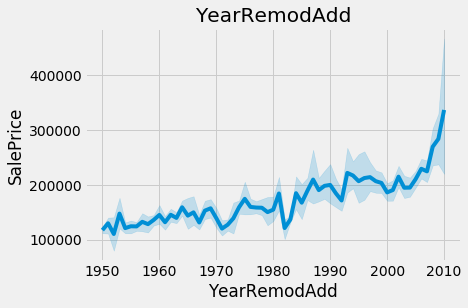

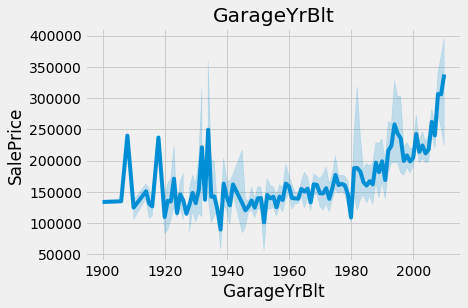

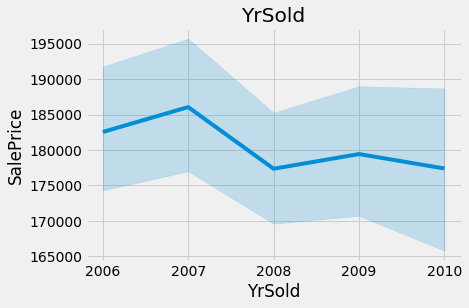

In [39]:
## Lets Find the realtionship between Temporal Features and Sale PRice

for feature in temporal_features:
    sns.lineplot(x=train[feature],y=train['SalePrice'])
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

### Boxplot for outliers

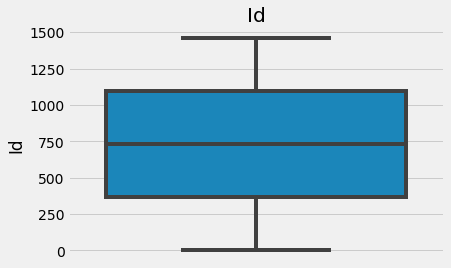

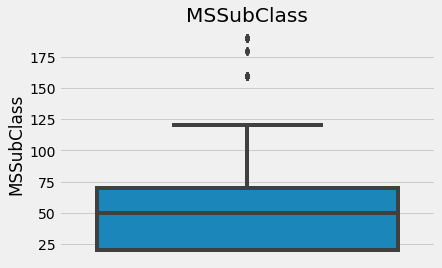

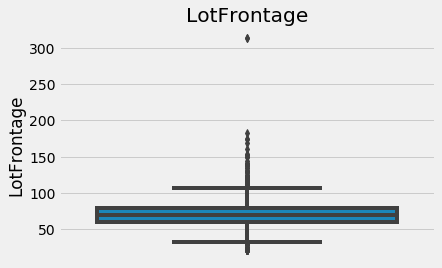

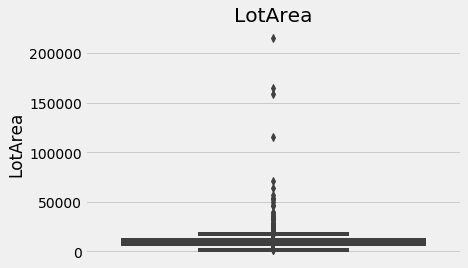

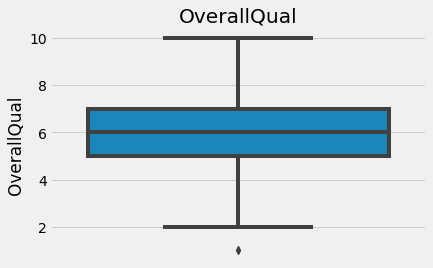

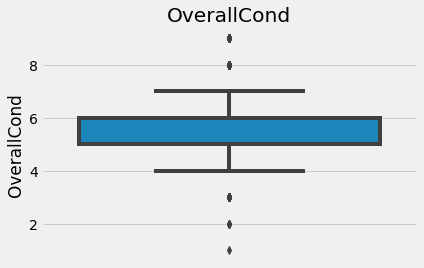

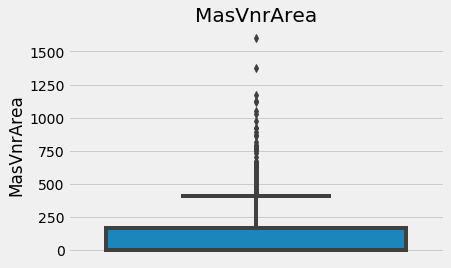

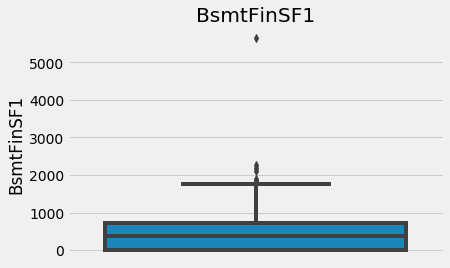

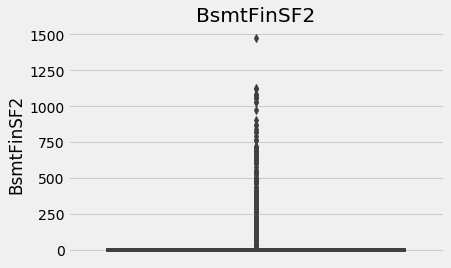

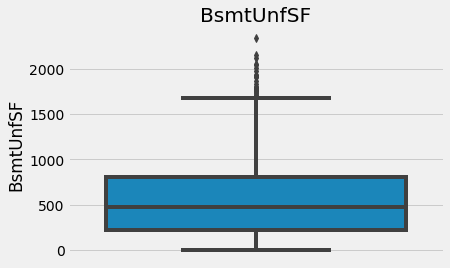

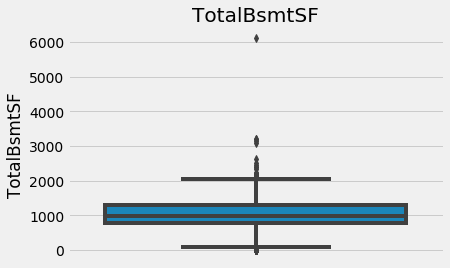

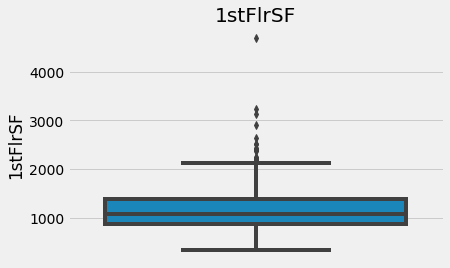

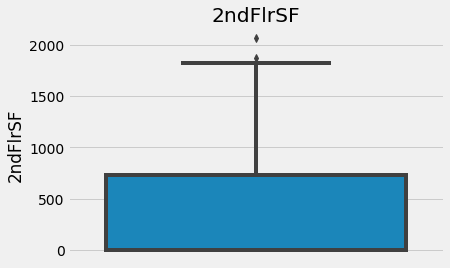

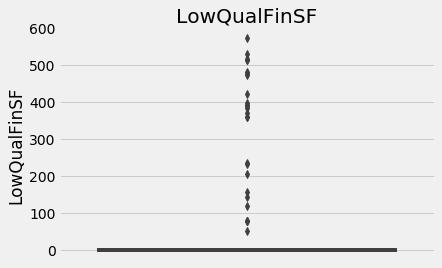

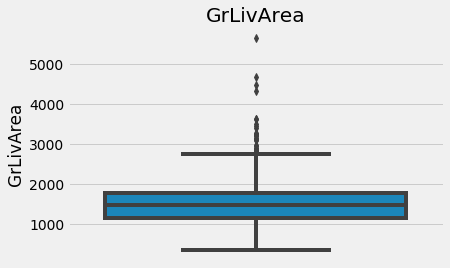

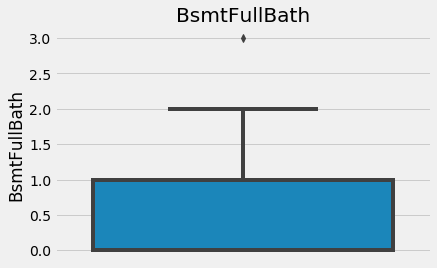

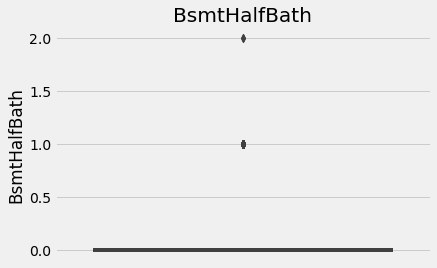

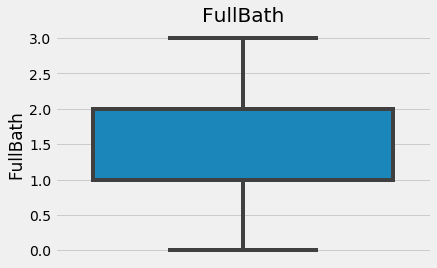

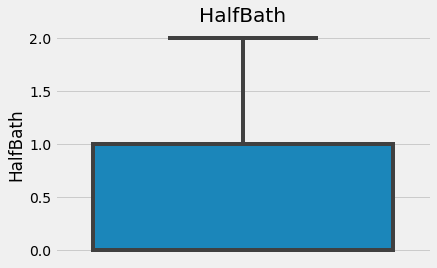

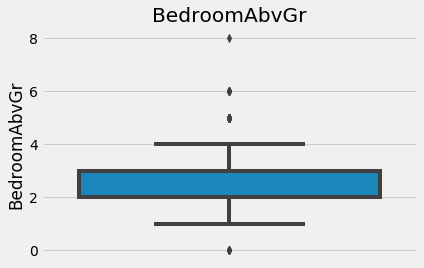

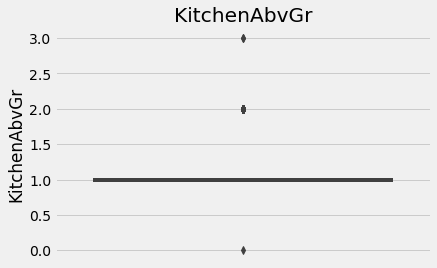

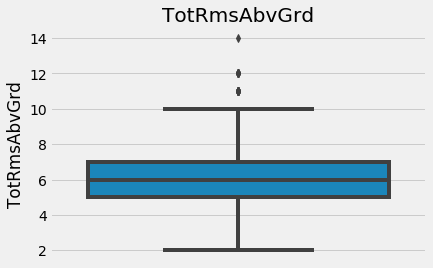

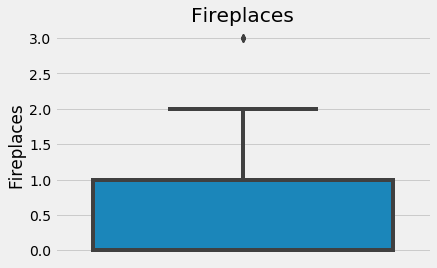

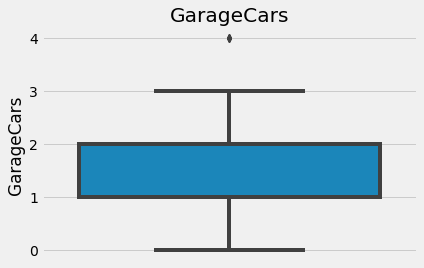

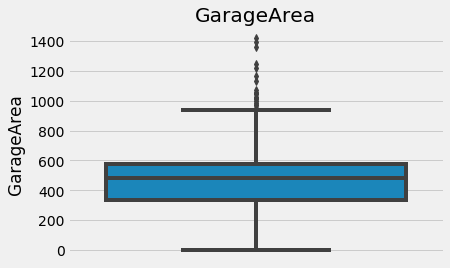

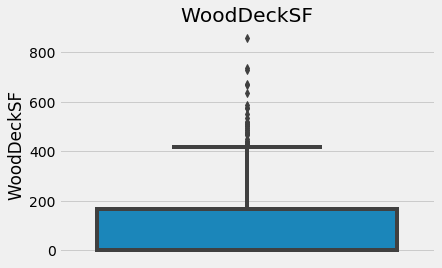

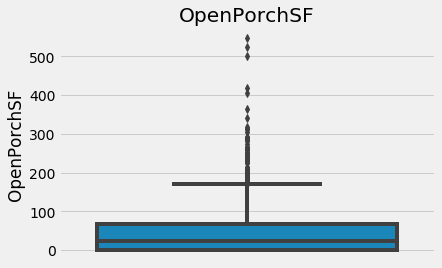

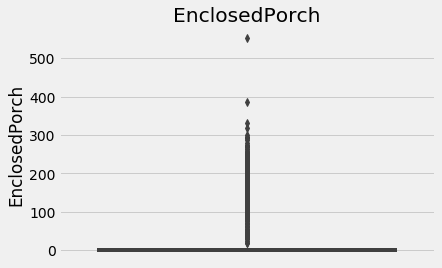

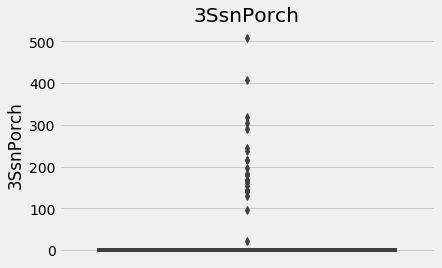

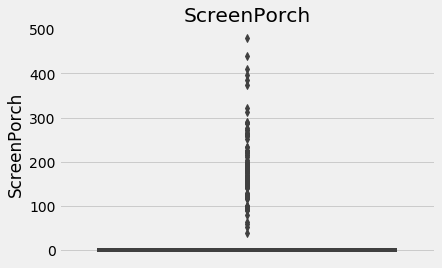

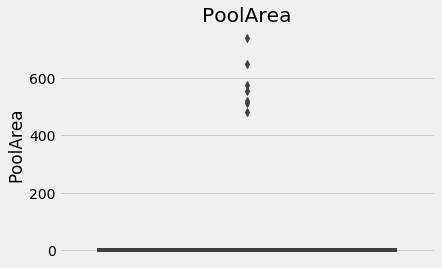

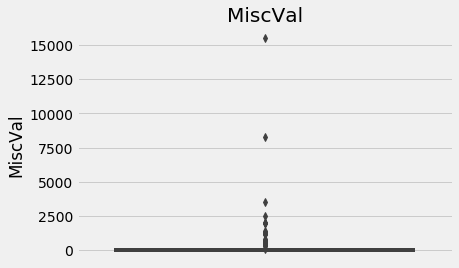

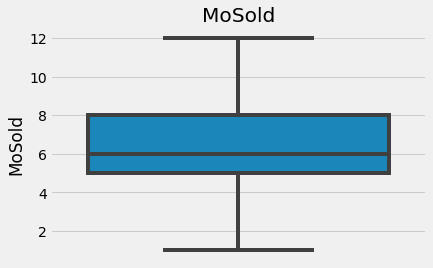

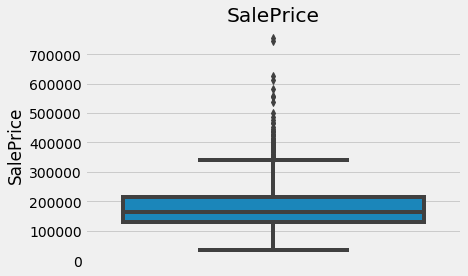

In [40]:
## Lets Find the realtionship between Categorical Features and Sale Price

for feature in numeric_features:
    sns.boxplot(y=train[feature])
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

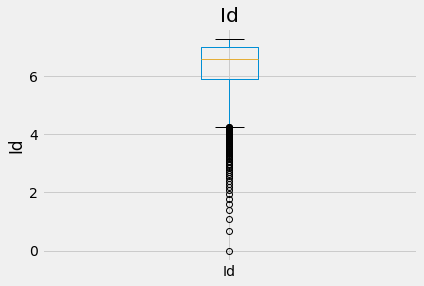

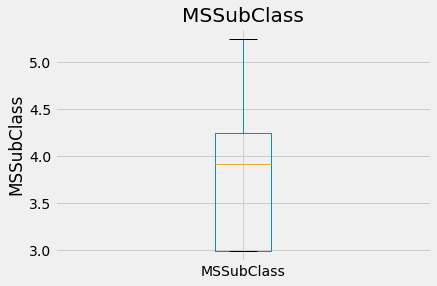

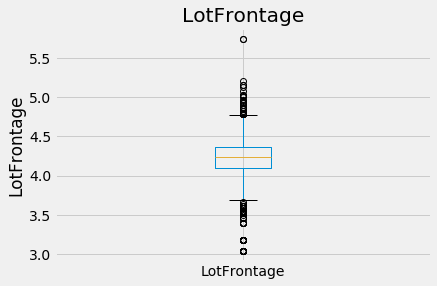

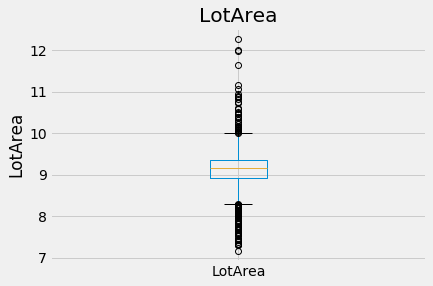

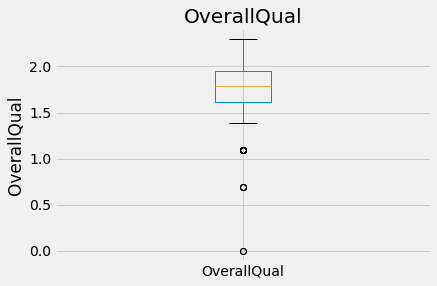

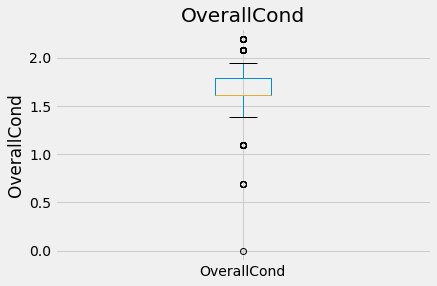

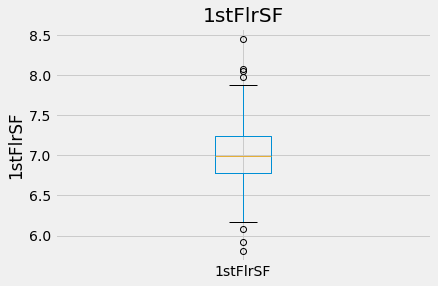

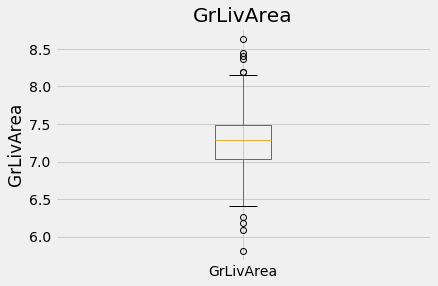

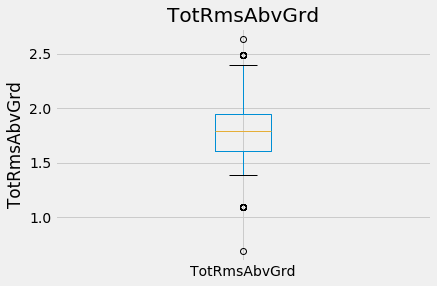

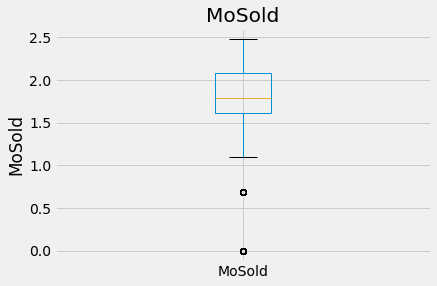

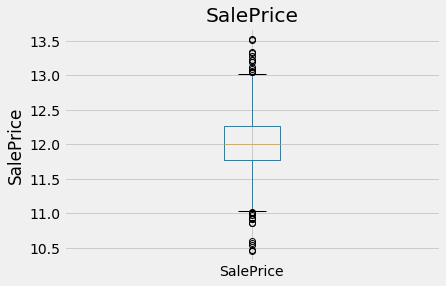

In [41]:
for feature in numeric_features:
    if 0 in train[feature].unique():
        pass
    else:
        train[feature]=np.log(train[feature])
        train.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Handling the Temporal Variables

In [42]:
temporal_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [43]:
train['YearBuilt']=train['YrSold']-train['YearBuilt']

In [44]:
train['YearRemodAdd']=train['YrSold']-train['YearRemodAdd']

In [45]:
train['GarageYrBlt']=train['YrSold']-train['GarageYrBlt']

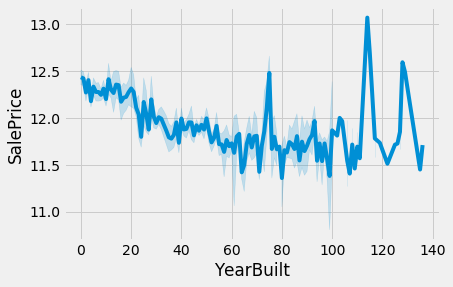

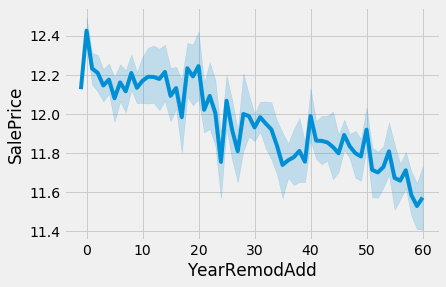

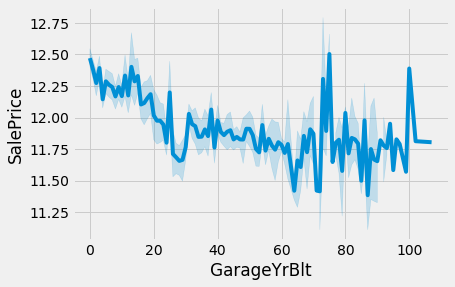

In [46]:
## Here we will compare the difference between All years feature with SalePrice

for feature in temporal_features:
    if feature!='YrSold':
        sns.lineplot(train[feature],train['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

## Handling Categorical Variables

In [47]:
object_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [48]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.000000,4.094345,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0.693147,2008,WD,Normal,12.247694
1,0.693147,2.995732,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,1.609438,2007,WD,Normal,12.109011
2,1.098612,4.094345,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,2.197225,2008,WD,Normal,12.317167
3,1.386294,4.248495,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,0.693147,2006,WD,Abnorml,11.849398
4,1.609438,4.094345,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,2.484907,2008,WD,Normal,12.429216


## Performing the same Feature Engineering on Test Data

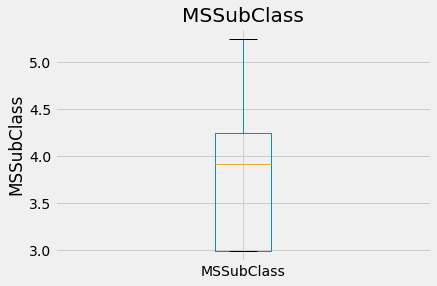

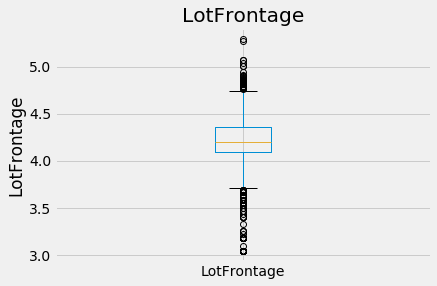

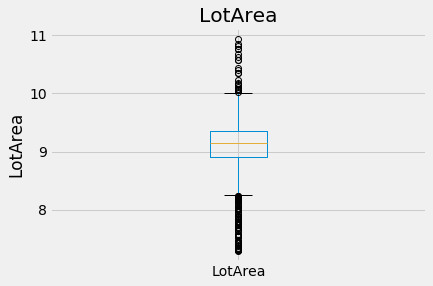

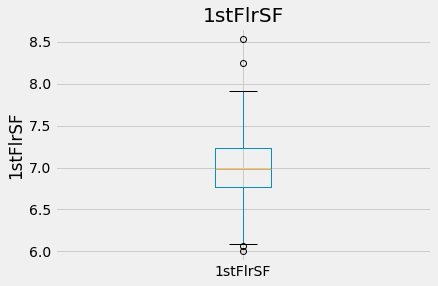

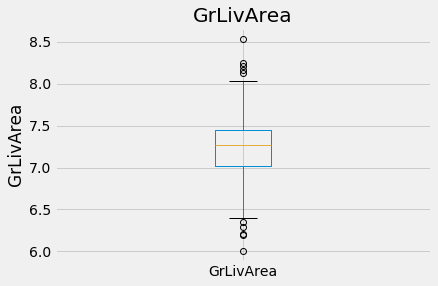

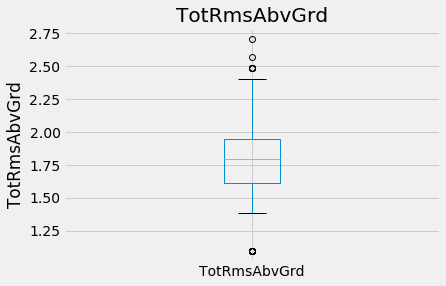

In [49]:
for feature in numeric_features_test:
    if 0 in train[feature].unique():
        pass
    else:
        test[feature]=np.log(test[feature])
        test.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

### Handling Temporal Variables

In [50]:
temporal_features_test

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [51]:
test['YearBuilt']=test['YrSold']-test['YearBuilt']

In [52]:
test['YearRemodAdd']=test['YrSold']-test['YearRemodAdd']

In [53]:
test['GarageYrBlt']=test['YrSold']-test['GarageYrBlt']

In [54]:
final_df=pd.concat([train,test],axis=0)


In [55]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   float64
 1   MSSubClass     2919 non-null   float64
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   float64
 5   Street         2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   float64
 17  OverallCond    2919 non-null   float64
 18  YearBuil

In [56]:
final_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.000000,4.094345,RL,4.174387,9.041922,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0.693147,2008,WD,Normal,12.247694
1,0.693147,2.995732,RL,4.382027,9.169518,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,1.609438,2007,WD,Normal,12.109011
2,1.098612,4.094345,RL,4.219508,9.328123,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,2.197225,2008,WD,Normal,12.317167
3,1.386294,4.248495,RL,4.094345,9.164296,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,0.693147,2006,WD,Abnorml,11.849398
4,1.609438,4.094345,RL,4.430817,9.565214,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,2.484907,2008,WD,Normal,12.429216


In [57]:
object_features=[features for features in final_df.columns if final_df[features].dtypes=='object']

In [58]:
def one_hot_encoding(obj_features):
    final_dfcopy=final_df.copy()
    for features in obj_features:
        print(features)
        df=pd.get_dummies(final_dfcopy[features],drop_first=True)
        df.head()
        final_dfcopy=pd.concat([df,final_dfcopy],axis=1)
    final_dfcopy.drop(obj_features,axis=1,inplace=True)   
    return final_dfcopy

In [59]:
final_df=one_hot_encoding(object_features)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [60]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]

In [61]:
final_df.shape

(2919, 178)

In [62]:
final_df.head()

,AdjLand,Alloca,Family,Normal,Partial,CWD,Con,ConLD,ConLI,ConLw,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,0,0,0,0,...,0,61,0,0,0,0,0,0.693147,2008,12.247694
1,0,0,0,1,0,0,0,0,0,0,...,298,0,0,0,0,0,0,1.609438,2007,12.109011
2,0,0,0,1,0,0,0,0,0,0,...,0,42,0,0,0,0,0,2.197225,2008,12.317167
3,0,0,0,0,0,0,0,0,0,0,...,0,35,272,0,0,0,0,0.693147,2006,11.849398
4,0,0,0,1,0,0,0,0,0,0,...,192,84,0,0,0,0,0,2.484907,2008,12.429216


In [63]:
final_df['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1454          NaN
1455          NaN
1456          NaN
1457          NaN
1458          NaN
Name: SalePrice, Length: 2919, dtype: float64

In [64]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Columns: 178 entries, AdjLand to SalePrice
dtypes: float64(21), int64(17), uint8(140)
memory usage: 1.3 MB


## Model Building and Prediction

In [105]:
df_Train=final_df.iloc[:1459,:]
df_Test=final_df.iloc[1459:,:]

In [106]:
df_Train.head()

,AdjLand,Alloca,Family,Normal,Partial,CWD,Con,ConLD,ConLI,ConLw,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,0,0,0,1,0,0,0,0,0,0,...,0,61,0,0,0,0,0,0.693147,2008,12.247694
1,0,0,0,1,0,0,0,0,0,0,...,298,0,0,0,0,0,0,1.609438,2007,12.109011
2,0,0,0,1,0,0,0,0,0,0,...,0,42,0,0,0,0,0,2.197225,2008,12.317167
3,0,0,0,0,0,0,0,0,0,0,...,0,35,272,0,0,0,0,0.693147,2006,11.849398
4,0,0,0,1,0,0,0,0,0,0,...,192,84,0,0,0,0,0,2.484907,2008,12.429216


In [107]:
df_Train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1454    12.128111
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
Name: SalePrice, Length: 1459, dtype: float64

In [108]:
df_Test['SalePrice']

1459    11.901583
0             NaN
1             NaN
2             NaN
3             NaN
          ...    
1454          NaN
1455          NaN
1456          NaN
1457          NaN
1458          NaN
Name: SalePrice, Length: 1460, dtype: float64

In [109]:
df_Test.head()

,AdjLand,Alloca,Family,Normal,Partial,CWD,Con,ConLD,ConLI,ConLw,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
1459,0,0,0,1,0,0,0,0,0,0,...,736,68,0,0,0,0,0,1.791759,2008,11.901583
0,0,0,0,1,0,0,0,0,0,0,...,140,0,0,0,120,0,0,6.000000,2010,NaN
1,0,0,0,1,0,0,0,0,0,0,...,393,36,0,0,0,0,12500,6.000000,2010,NaN
2,0,0,0,1,0,0,0,0,0,0,...,212,34,0,0,0,0,0,3.000000,2010,NaN
3,0,0,0,1,0,0,0,0,0,0,...,360,36,0,0,0,0,0,6.000000,2010,NaN


In [110]:
df_Test.shape

(1460, 178)

## Feature Selection 

In [111]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [112]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=23)) 
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True,
                                max_iter=1000, normalize=False, positive=False,
                                precompute=False, random_state=23,
                                selection='cyclic', tol=0.0001,
                                warm_start=False),
                max_features=None, norm_order=1, prefit=False, threshold=None)

In [113]:

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 177
selected features: 31
features with coefficients shrank to zero: 145


In [114]:
selected_feat

Index(['Unf', 'No', 'CBlock', 'PConc', 'Crawfor', 'RL', 'MSSubClass',
       'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea'],
      dtype='object')

In [115]:
X_train=X_train[selected_feat]


In [116]:
regressor=XGBRegressor()

In [117]:
booster=['gbtree','gblinear']
base_score=[0.25,0.5,0.75,1]

In [118]:
## Hyper Parameter Optimization


n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
booster=['gbtree','gblinear']
learning_rate=[0.05,0.1,0.15,0.20]
min_child_weight=[1,2,3,4]

# Define the grid of hyperparameters to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth':max_depth,
    'learning_rate':learning_rate,
    'min_child_weight':min_child_weight,
    'booster':booster,
    'base_score':base_score
    }

In [119]:
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=hyperparameter_grid,
            cv=5, n_iter=50,
            scoring = 'neg_mean_absolute_error',n_jobs = 4,
            verbose = 5, 
            return_train_score = True,
            random_state=42)

In [121]:
random_cv.fit(X_train,y_train)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:   15.0s
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:  2.3min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed:  3.6min finished


[12:44:04] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   iid='deprecated', n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['g

In [83]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [84]:
model = XGBRegressor(base_score=0.25, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.05, max_delta_step=0,
             max_depth=2, min_child_weight=4, missing=None, n_estimators=900,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)


In [85]:
regressor.fit(X_train,y_train)

[12:19:35] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [86]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

D:\Anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [88]:
df_Test.shape


(1497, 177)

In [91]:
df_Test=df_Test[selected_feat]
df_Test.head()

,Unf,No,CBlock,PConc,Crawfor,RL,MSSubClass,LotArea,OverallQual,OverallCond,...,BsmtFullBath,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
1422,0,0,0,1,0,0,4.787492,8.397283,1.791759,1.609438,...,1.0,0,5.0,2.0,420.0,140,0,0,0,0
1423,1,0,1,0,0,1,4.382027,9.887866,1.791759,1.945910,...,0.0,1,40.0,2.0,432.0,586,0,0,0,738
1424,1,1,1,0,0,1,2.995732,9.159363,1.609438,1.609438,...,1.0,1,37.0,1.0,484.0,316,0,0,0,0
1425,1,1,1,0,0,1,2.995732,9.279960,1.791759,1.791759,...,0.0,0,48.0,2.0,528.0,0,0,0,0,0
1426,0,1,0,1,0,1,4.094345,9.300547,1.945910,1.609438,...,1.0,2,14.0,2.0,525.0,171,0,0,0,0


In [92]:
df_Test.head()

,Unf,No,CBlock,PConc,Crawfor,RL,MSSubClass,LotArea,OverallQual,OverallCond,...,BsmtFullBath,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea
1422,0,0,0,1,0,0,4.787492,8.397283,1.791759,1.609438,...,1.0,0,5.0,2.0,420.0,140,0,0,0,0
1423,1,0,1,0,0,1,4.382027,9.887866,1.791759,1.945910,...,0.0,1,40.0,2.0,432.0,586,0,0,0,738
1424,1,1,1,0,0,1,2.995732,9.159363,1.609438,1.609438,...,1.0,1,37.0,1.0,484.0,316,0,0,0,0
1425,1,1,1,0,0,1,2.995732,9.279960,1.791759,1.791759,...,0.0,0,48.0,2.0,528.0,0,0,0,0,0
1426,0,1,0,1,0,1,4.094345,9.300547,1.945910,1.609438,...,1.0,2,14.0,2.0,525.0,171,0,0,0,0


In [93]:
y_pred=regressor.predict(df_Test)


In [94]:
y_pred

array([11.878339, 12.098952, 11.825503, ..., 12.522978, 12.159532,
       12.615305], dtype=float32)

In [96]:
#Create Sample Submission file and Submit using ANN
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
datasets.to_csv('AdvancedHousingusingXGBoost1.csv',index=False)

In [202]:
pred

,0
0,11.865345
1,12.069228
2,11.809572
3,11.846424
4,12.436179
...,...
1492,11.608073
1493,11.743551
1494,12.416227
1495,12.064445
